# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning - Optional:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


Training SGDRegressor...
Training LinearRegression...
Training DecisionTree...
Training RandomForest...
Training RidgeRegression...
Training LassoRegression...
Model Performance Comparison:
              Model       MAE       MSE      RMSE        R²
0      SGDRegressor  0.693743  0.907722  0.952744  0.102575
1  LinearRegression  0.699620  0.912562  0.955281  0.097791
2      DecisionTree  0.872197  1.799610  1.341496 -0.779195
3      RandomForest  0.728859  0.995567  0.997781  0.015727
4   RidgeRegression  0.698952  0.910936  0.954430  0.099398
5   LassoRegression  0.760262  1.004541  1.002268  0.006855


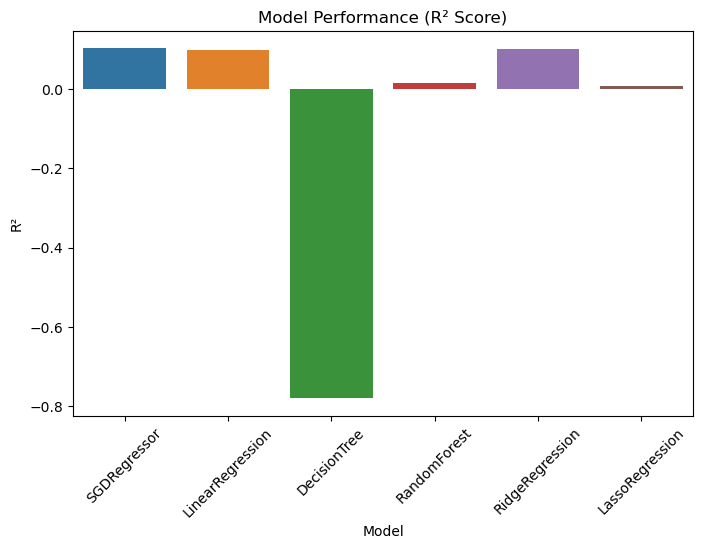

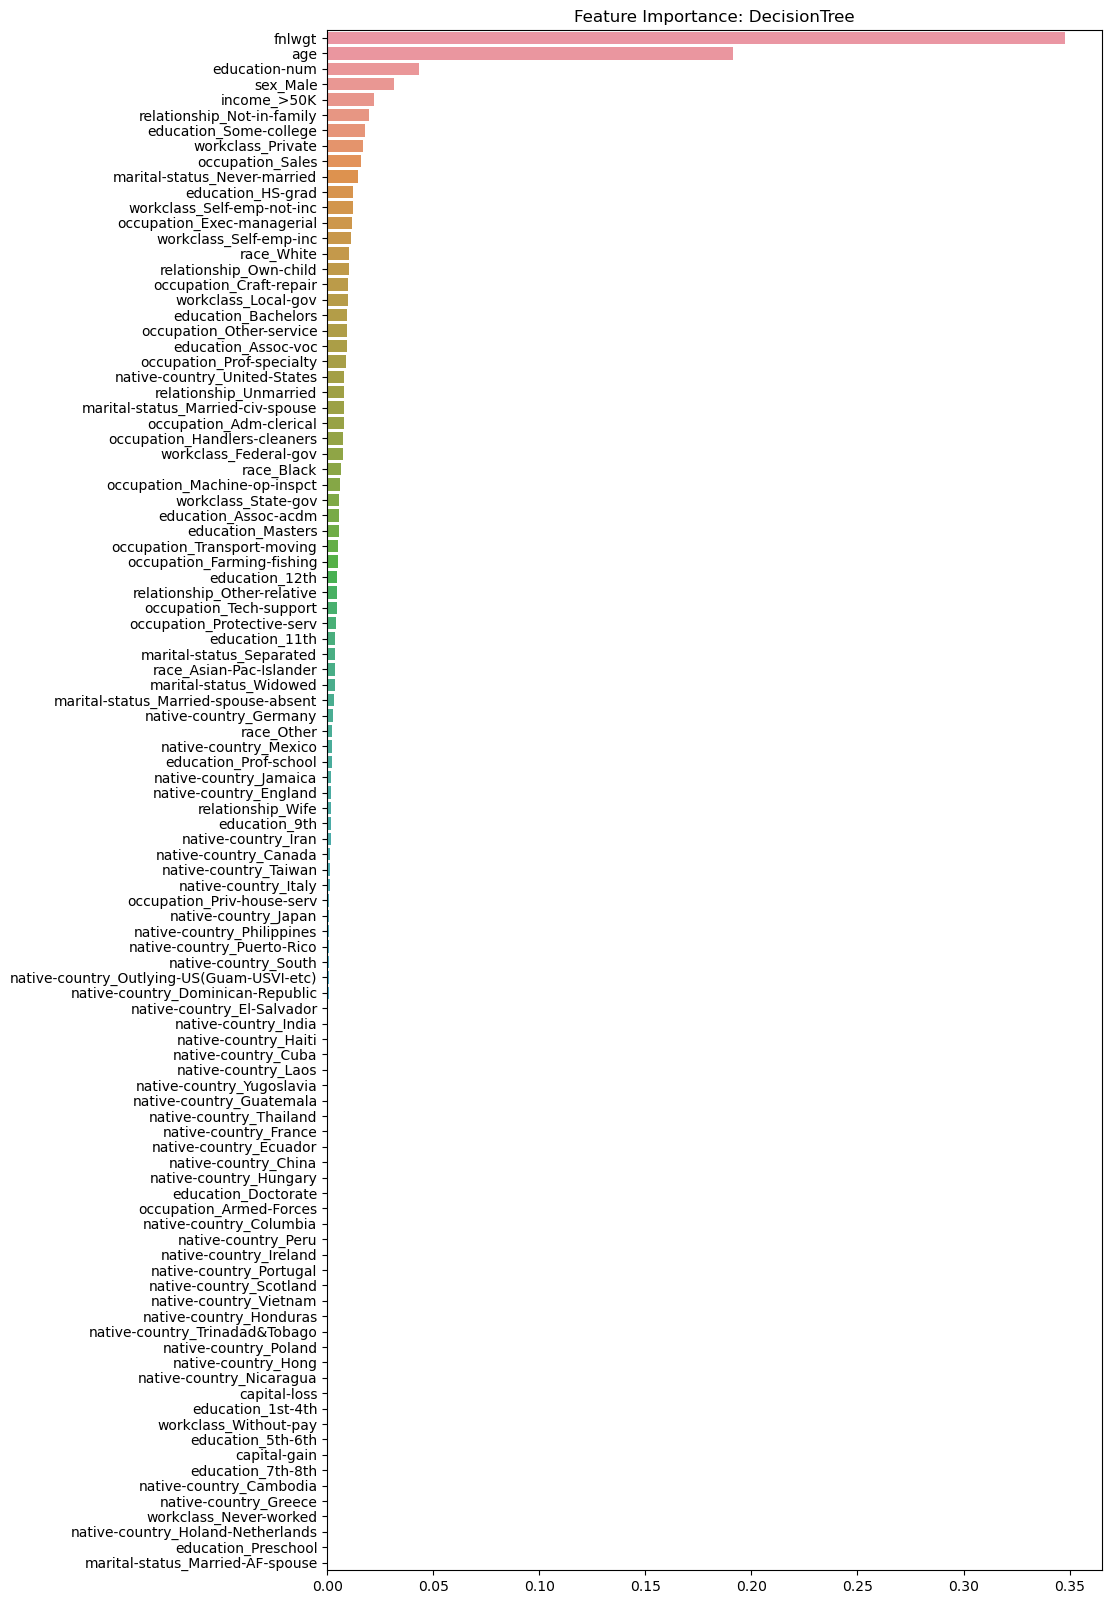

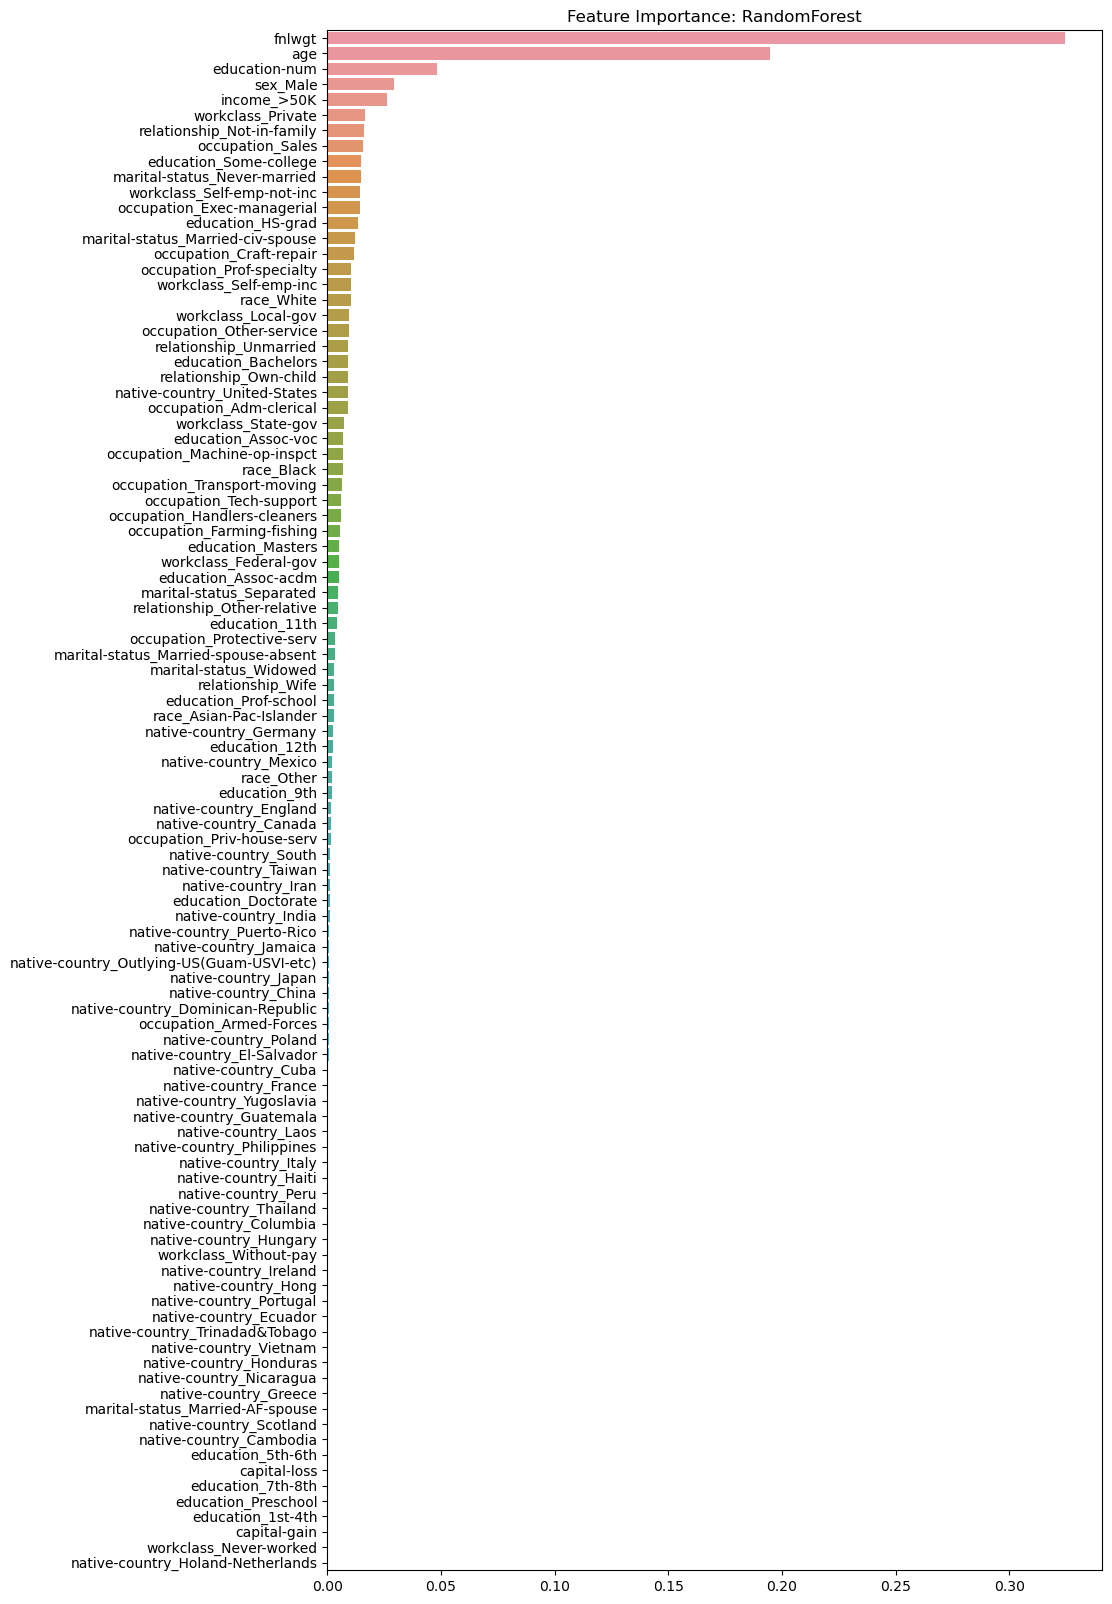

Results saved to model_results.csv


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load preprocessed dataset (Update paths if needed)
train_data_path = 'train_preprocessed.csv'
test_data_path = 'test_preprocessed.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Ensure target variable 'hours-per-week' exists
if 'hours-per-week' not in train_data.columns:
    raise ValueError("Target variable 'hours-per-week' not found in dataset.")

# Separate features (X) and target (y)
X_train, y_train = train_data.drop(columns=['hours-per-week']), train_data['hours-per-week']
X_test, y_test = test_data.drop(columns=['hours-per-week']), test_data['hours-per-week']

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models
models = {
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=50, random_state=42),
    "RidgeRegression": Ridge(alpha=1.0),
    "LassoRegression": Lasso(alpha=0.1)
}

# Train and evaluate models
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"])
print("Model Performance Comparison:")
print(results_df)

# Plot R² Scores for different models
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df['Model'], y=results_df['R²'])
plt.title("Model Performance (R² Score)")
plt.xticks(rotation=45)
plt.show()

# Feature importance (for tree-based models)
tree_models = ["DecisionTree", "RandomForest"]
for model_name in tree_models:
    model = models[model_name]
    feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 20))
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title(f"Feature Importance: {model_name}")
    plt.show()

# Save results to CSV
results_df.to_csv("model_results.csv", index=False)
print("Results saved to model_results.csv")
